In [37]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

## To parse data:
def parse_xml(xml_file):
    with open(xml_file, 'r') as f:
        xml_data = f.read()

    soup = BeautifulSoup(xml_data, 'xml')
    return soup

## To extract data for the each value:
def extract_data(parsed_xml):
    data = []
    objects = parsed_xml.find_all('object')
    for obj in objects:
        name = obj.find('name').text
        xmin = float(obj.find('xmin').text)
        ymin = float(obj.find('ymin').text)
        xmax = float(obj.find('xmax').text)
        ymax = float(obj.find('ymax').text)
        data.append({'name': name, 'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax})
    return data

## Path of the input file xml:
xml_file_path = 'C:/Users/julia/OneDrive/Desktop/PXL_20230503_224327025.xml'

parsed_xml = parse_xml(xml_file_path)
data = extract_data(parsed_xml)

## To form data base:
df = pd.DataFrame(data)
print(df)

     name     xmin     ymin     xmax     ymax
0       0  1599.57  2002.22  1661.77  2044.59
1       0  1543.68  2018.90  1604.30  2059.24
2       0  1438.43  2013.04  1506.04  2064.88
3       0  1449.02  2059.92  1519.56  2096.20
4       0  1497.70  2012.36  1547.28  2062.85
...   ...      ...      ...      ...      ...
1322    0   644.81  3464.67   693.49  3508.49
1323    0   663.47  3438.98   732.44  3479.55
1324    0   690.41  3386.51   734.76  3451.42
1325    0  1482.82  1128.29  1539.16  1179.37
1326    0  1494.65  1098.62  1568.46  1132.80

[1327 rows x 5 columns]


In [38]:
## To add specific new columns: coordinates for the center, width and length:
df['center_x'] = (df['xmin'] + df['xmax']) / 2
df['center_y'] = (df['ymin'] + df['ymax']) / 2
df['width'] = df['xmax'] - df['xmin']
df['height'] = df['ymax'] - df['ymin']

print(df)

     name     xmin     ymin     xmax     ymax  center_x  center_y  width  \
0       0  1599.57  2002.22  1661.77  2044.59  1630.670  2023.405  62.20   
1       0  1543.68  2018.90  1604.30  2059.24  1573.990  2039.070  60.62   
2       0  1438.43  2013.04  1506.04  2064.88  1472.235  2038.960  67.61   
3       0  1449.02  2059.92  1519.56  2096.20  1484.290  2078.060  70.54   
4       0  1497.70  2012.36  1547.28  2062.85  1522.490  2037.605  49.58   
...   ...      ...      ...      ...      ...       ...       ...    ...   
1322    0   644.81  3464.67   693.49  3508.49   669.150  3486.580  48.68   
1323    0   663.47  3438.98   732.44  3479.55   697.955  3459.265  68.97   
1324    0   690.41  3386.51   734.76  3451.42   712.585  3418.965  44.35   
1325    0  1482.82  1128.29  1539.16  1179.37  1510.990  1153.830  56.34   
1326    0  1494.65  1098.62  1568.46  1132.80  1531.555  1115.710  73.81   

      height  
0      42.37  
1      40.34  
2      51.84  
3      36.28  
4      50.49

In [34]:
statistics = df[['width', 'height']].describe()
print(statistics)

             width       height
count  1327.000000  1327.000000
mean     51.745268    52.519186
std      13.099167    13.186763
min      19.720000    18.930000
25%      39.665000    40.580000
50%      51.610000    53.520000
75%      63.555000    64.180000
max      77.890000    83.080000


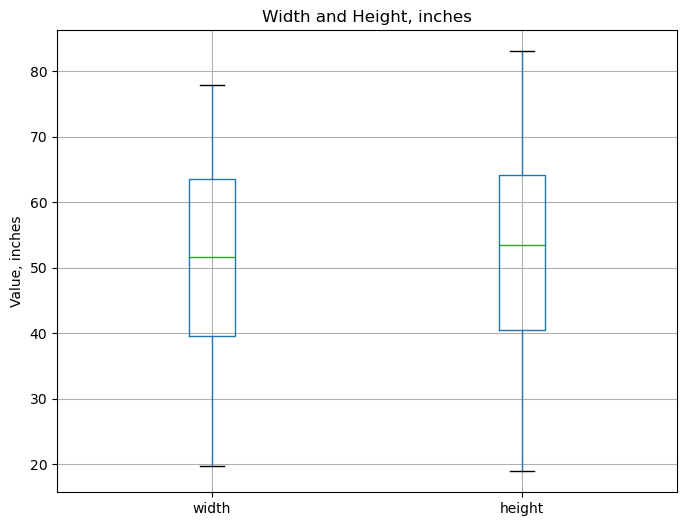

In [39]:
## To create box plots
plt.figure(figsize = (8, 6))
df[['width', 'height']].boxplot()
plt.title('Width and Height, inches')
plt.ylabel('Value, inches')
plt.show()